# 数据分析

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('US-pumpkins.csv') 
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
# 设置缺失率阈值
threshold = 0.75

# 计算每列的缺失率
missing_ratio = df.isnull().mean()

print(missing_ratio)

City Name          0.000000
Type               0.974388
Package            0.000000
Variety            0.002846
Sub Variety        0.831531
Grade              1.000000
Date               0.000000
Low Price          0.000000
High Price         0.000000
Mostly Low         0.058623
Mostly High        0.058623
Origin             0.001707
Origin District    0.925441
Item Size          0.158793
Color              0.350598
Environment        1.000000
Unit of Sale       0.907797
Quality            1.000000
Condition          1.000000
Appearance         1.000000
Storage            1.000000
Crop               1.000000
Repack             0.000000
Trans Mode         1.000000
Unnamed: 24        1.000000
Unnamed: 25        0.941377
dtype: float64


In [3]:
# 筛选出缺失率低于阈值的列
cols_to_keep = missing_ratio[missing_ratio < threshold].index
print(cols_to_keep)

Index(['City Name', 'Package', 'Variety', 'Date', 'Low Price', 'High Price',
       'Mostly Low', 'Mostly High', 'Origin', 'Item Size', 'Color', 'Repack'],
      dtype='object')


In [4]:
cols_to_drop = missing_ratio[missing_ratio > threshold].index
print(cols_to_drop)

Index(['Type', 'Sub Variety', 'Grade', 'Origin District', 'Environment',
       'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop',
       'Trans Mode', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')


In [5]:
df = df.drop(cols_to_drop, axis=1)

In [6]:
df.shape

(1757, 12)

In [7]:
# 数值型列与 High Price 的相关性
numeric_cols = df.select_dtypes(include=[np.number]).columns
if 'High Price' in numeric_cols:
    high_price_corr = df[numeric_cols].corr()['High Price'].sort_values(ascending=False)
    print("Correlation with 'High Price' (numeric features):")
    print(high_price_corr)
else:
    print("'High Price' not found in numeric columns.")

Correlation with 'High Price' (numeric features):
High Price     1.000000
Mostly High    0.996174
Mostly Low     0.989539
Low Price      0.987353
Name: High Price, dtype: float64


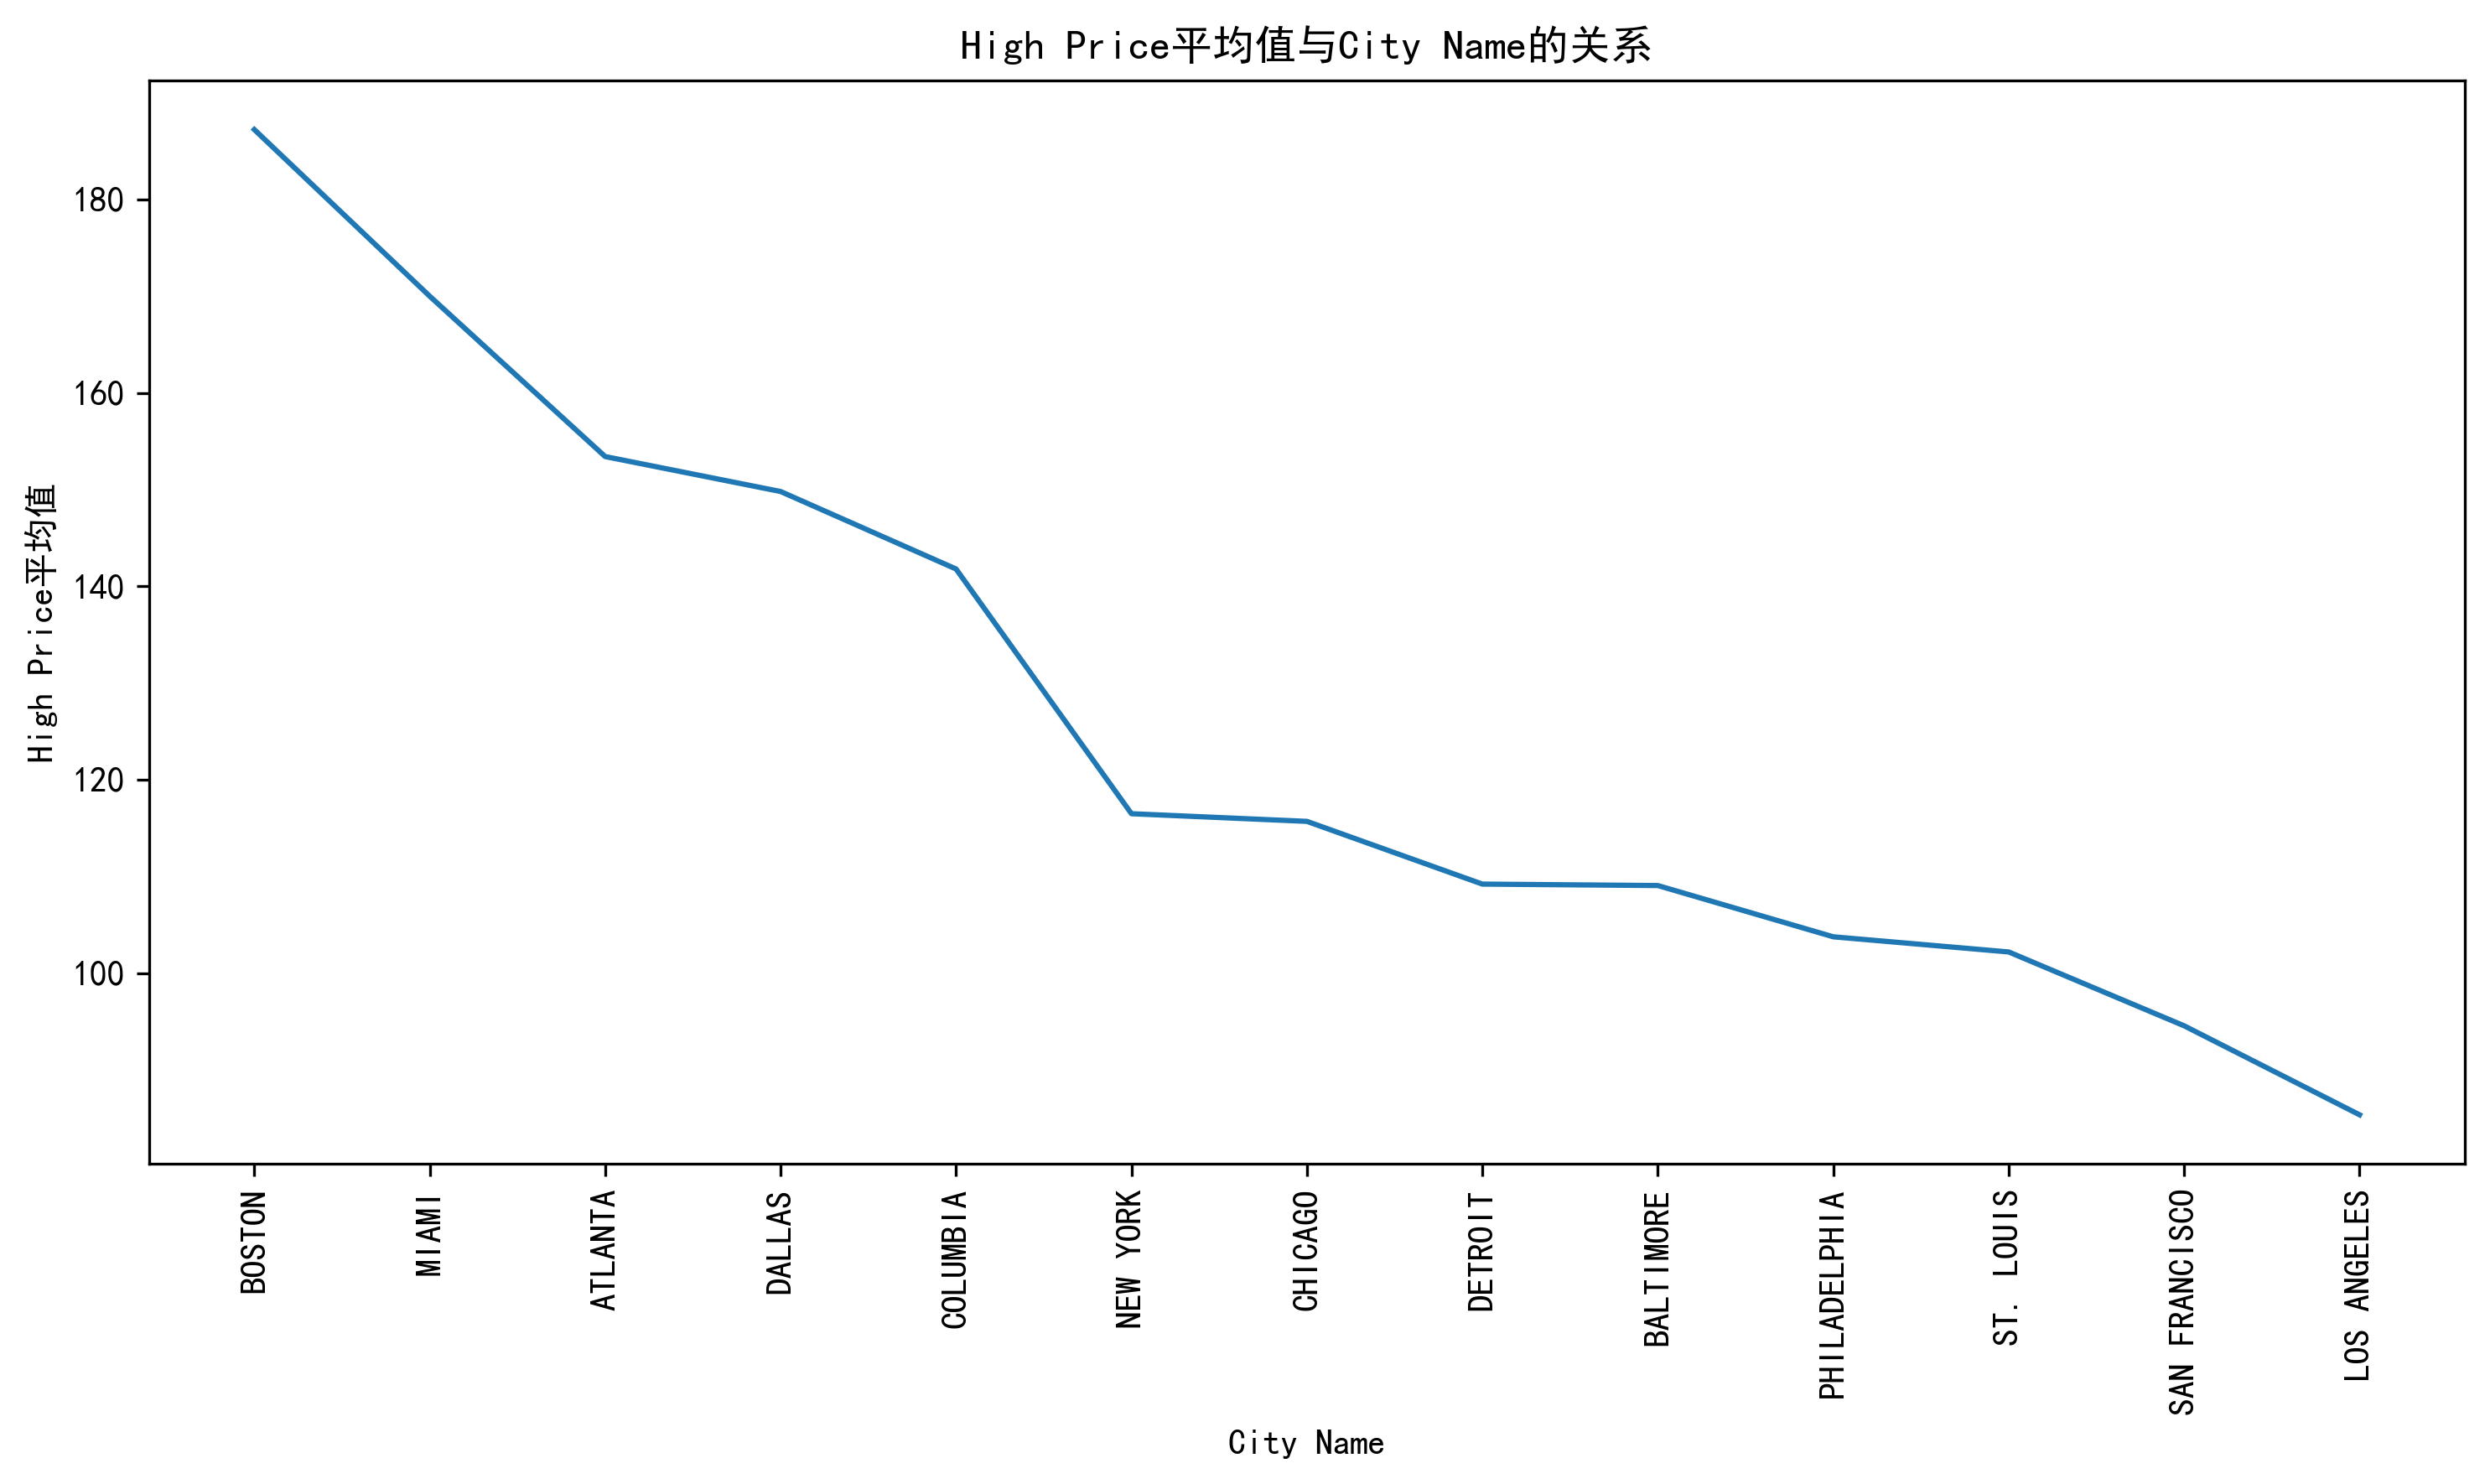


Average 'High Price' by 'City Name':
City Name
BOSTON      187.235795
MIAMI       170.000000
ATLANTA     153.416667
DALLAS      149.802920
COLUMBIA    141.790875
Name: High Price, dtype: float64


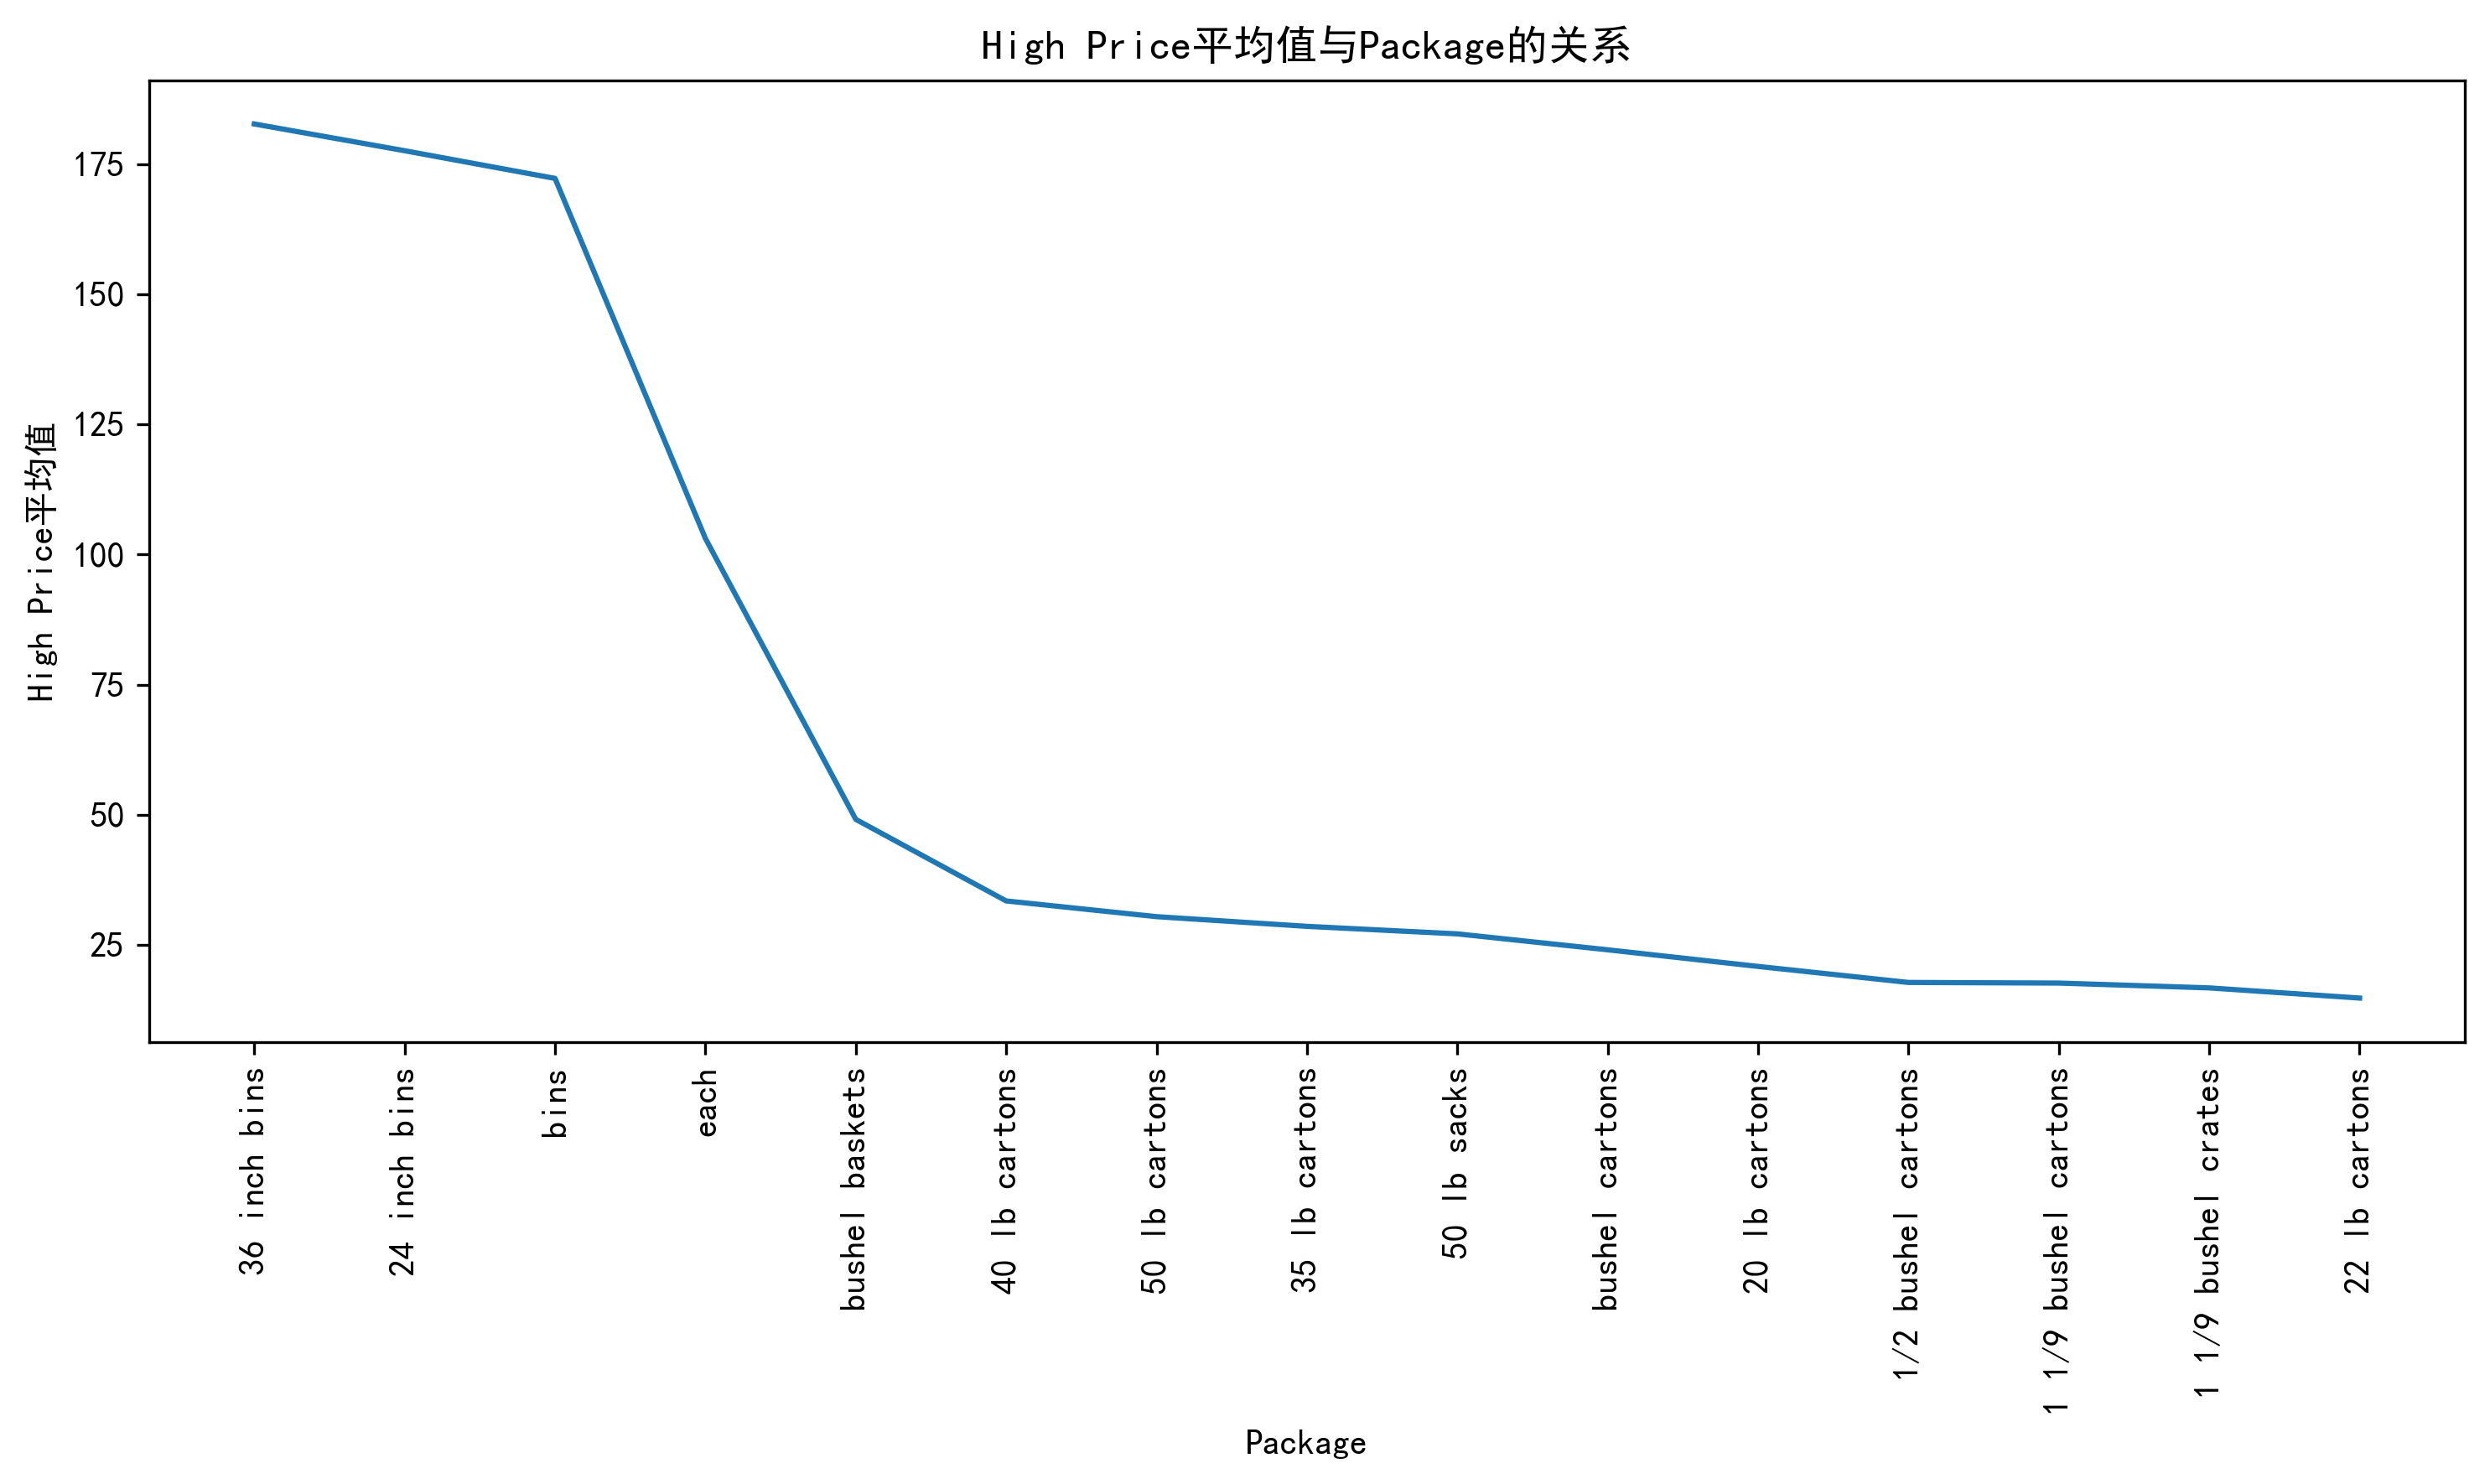


Average 'High Price' by 'Package':
Package
36 inch bins      182.769306
24 inch bins      177.626842
bins              172.307692
each              103.102941
bushel baskets     49.100000
Name: High Price, dtype: float64


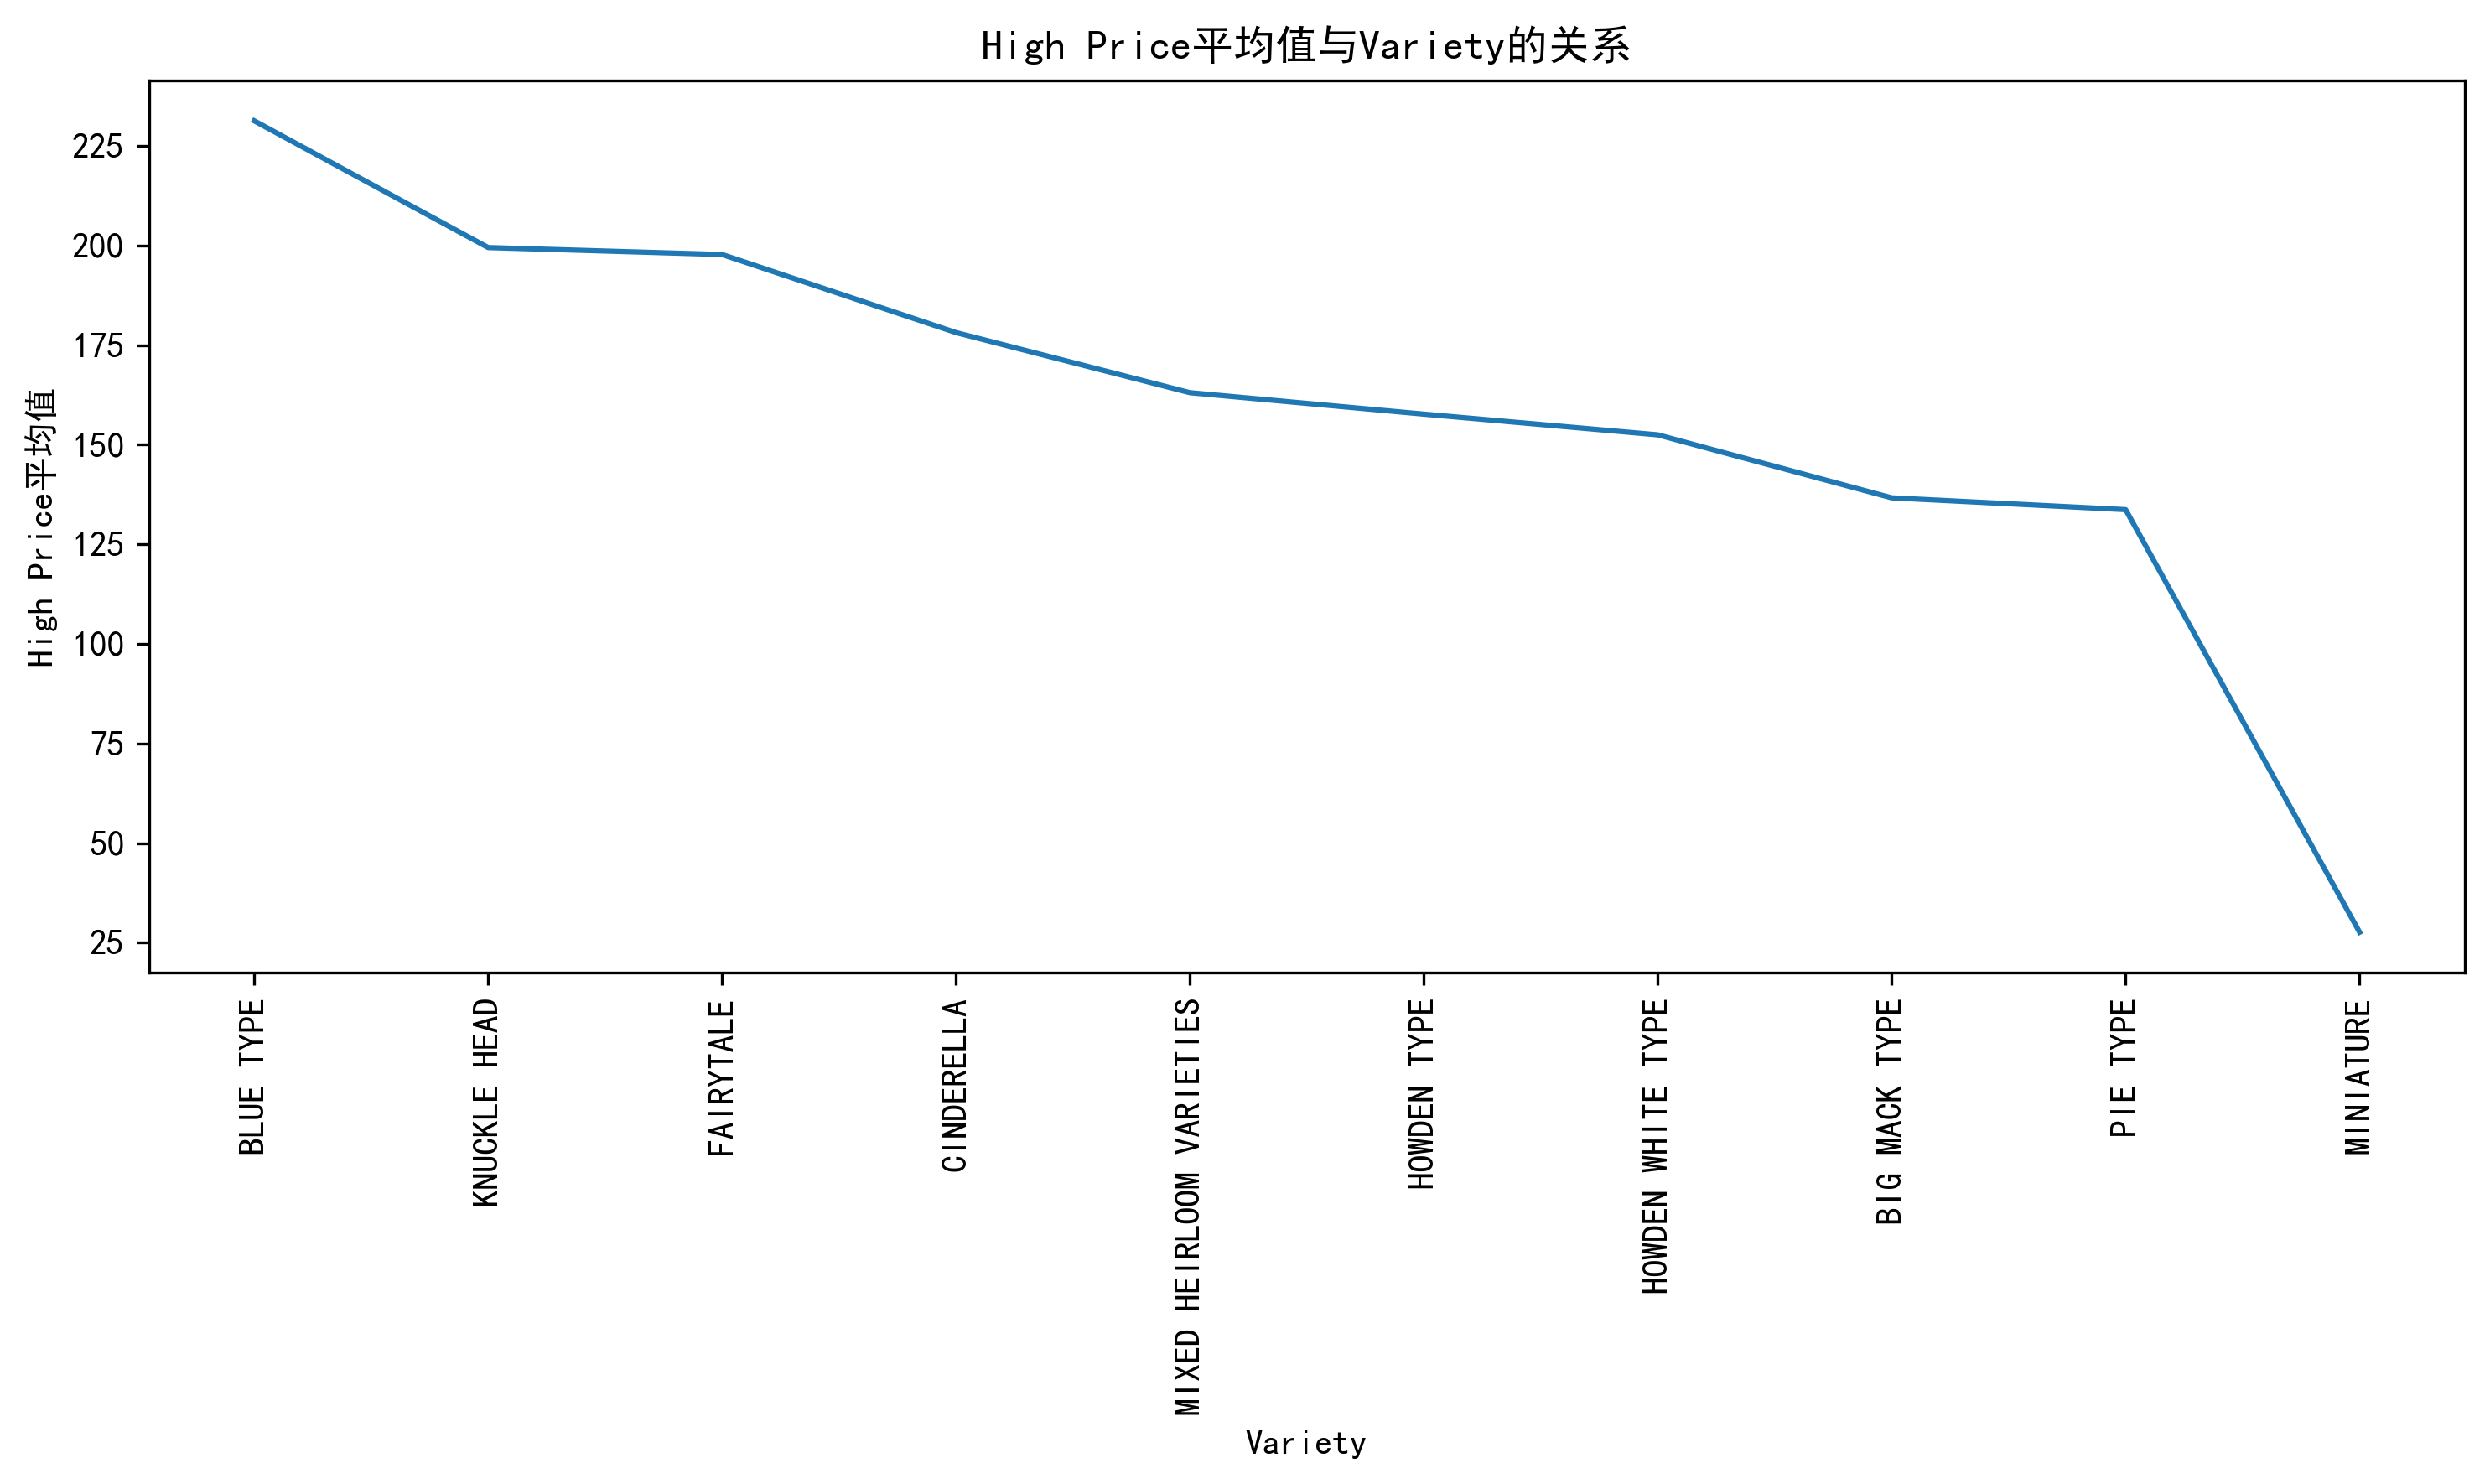


Average 'High Price' by 'Variety':
Variety
BLUE TYPE                   231.315789
KNUCKLE HEAD                199.500000
FAIRYTALE                   197.753333
CINDERELLA                  178.153086
MIXED HEIRLOOM VARIETIES    163.070175
Name: High Price, dtype: float64


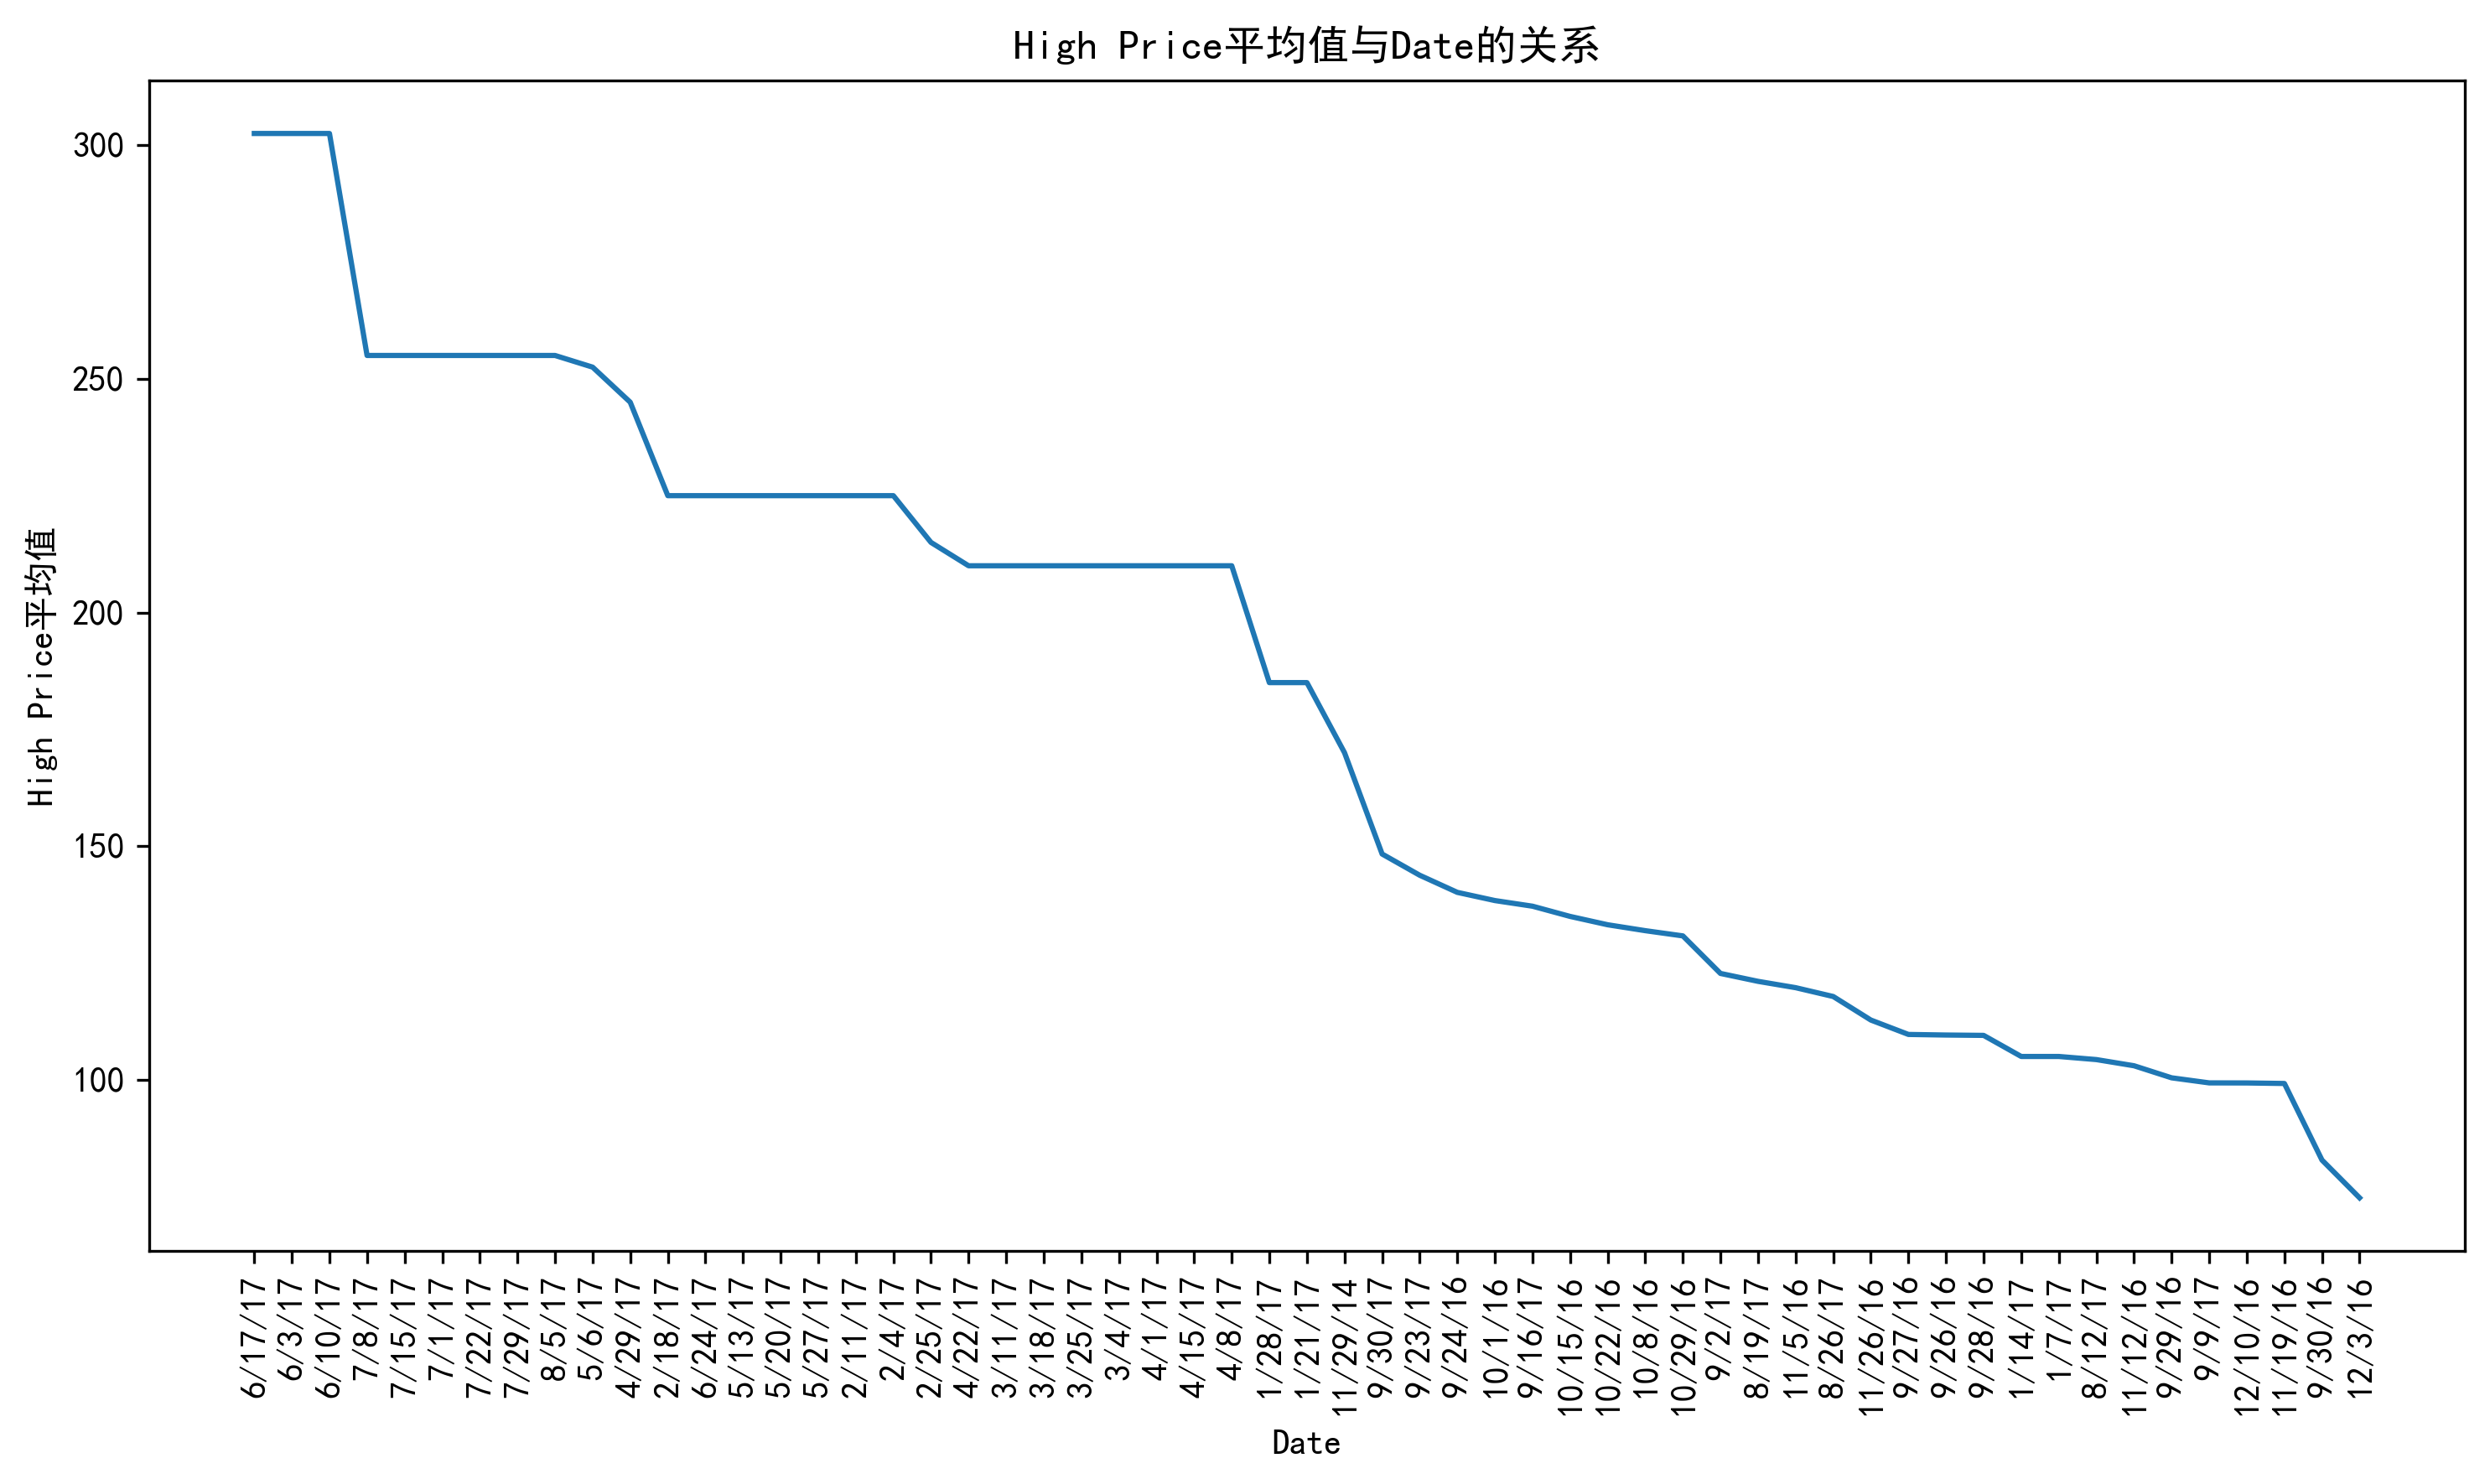


Average 'High Price' by 'Date':
Date
6/17/17    302.5
6/3/17     302.5
6/10/17    302.5
7/8/17     255.0
7/15/17    255.0
Name: High Price, dtype: float64


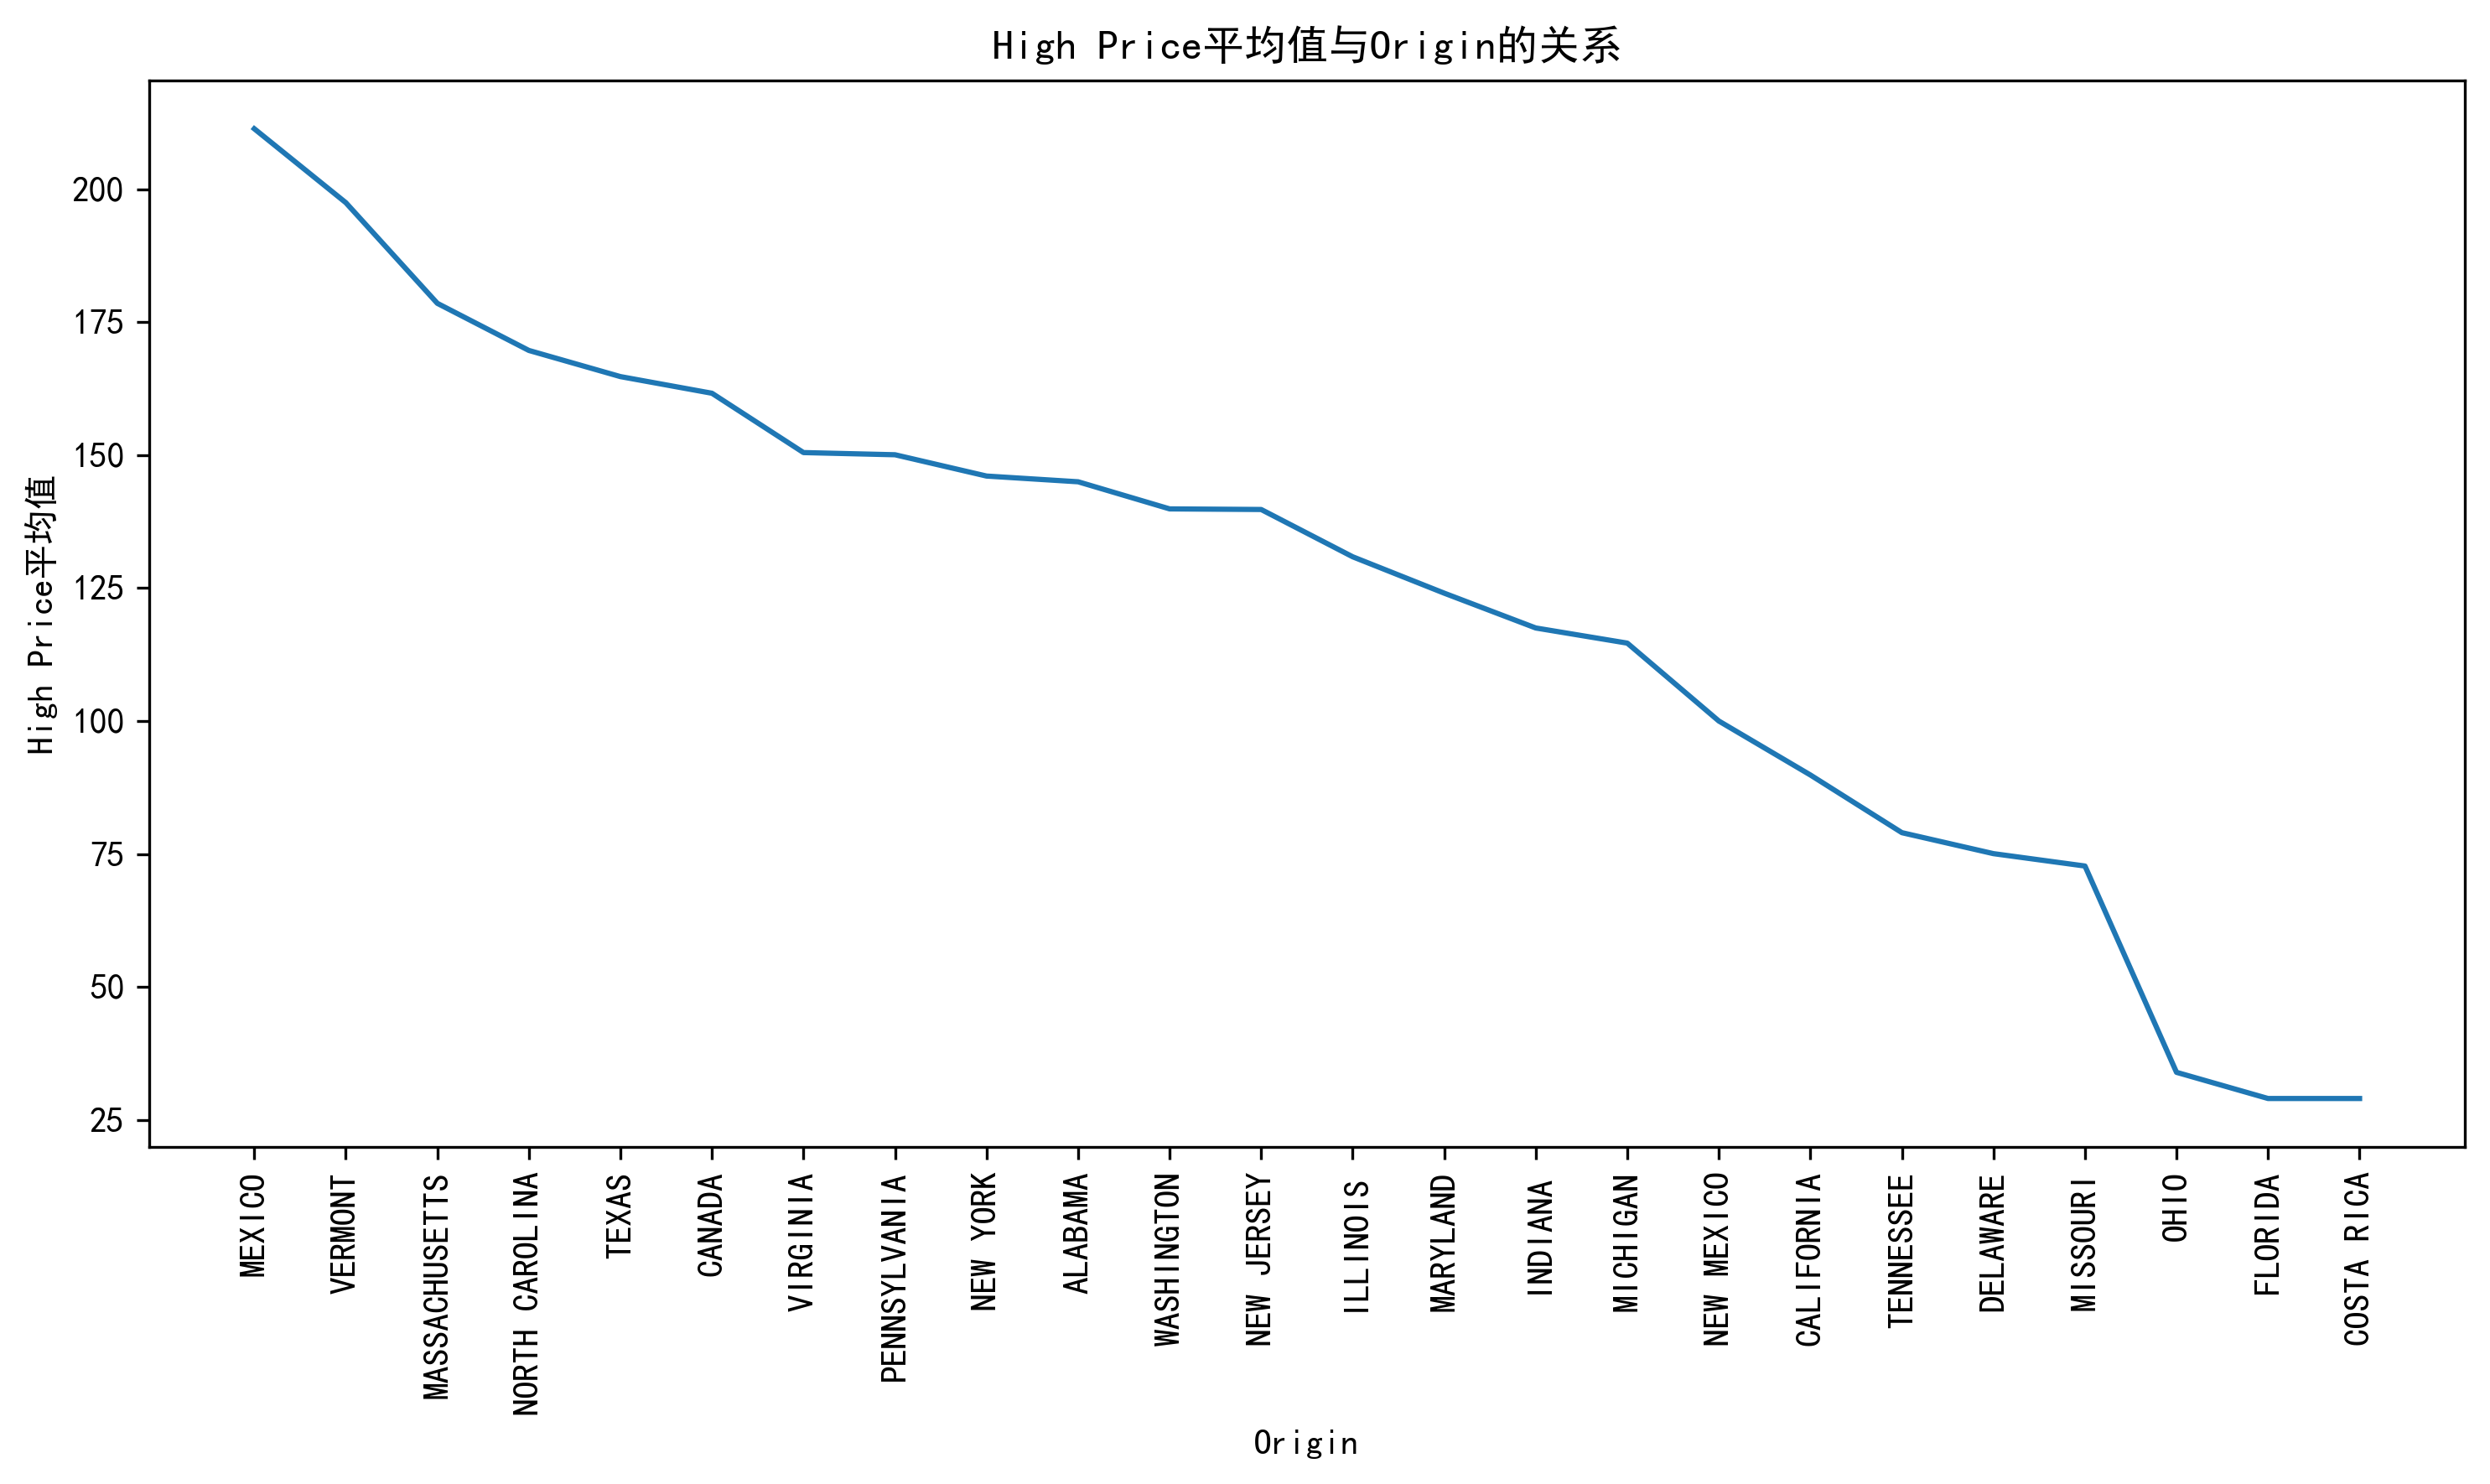


Average 'High Price' by 'Origin':
Origin
MEXICO            211.400000
VERMONT           197.500000
MASSACHUSETTS     178.563452
NORTH CAROLINA    169.701493
TEXAS             164.782609
Name: High Price, dtype: float64


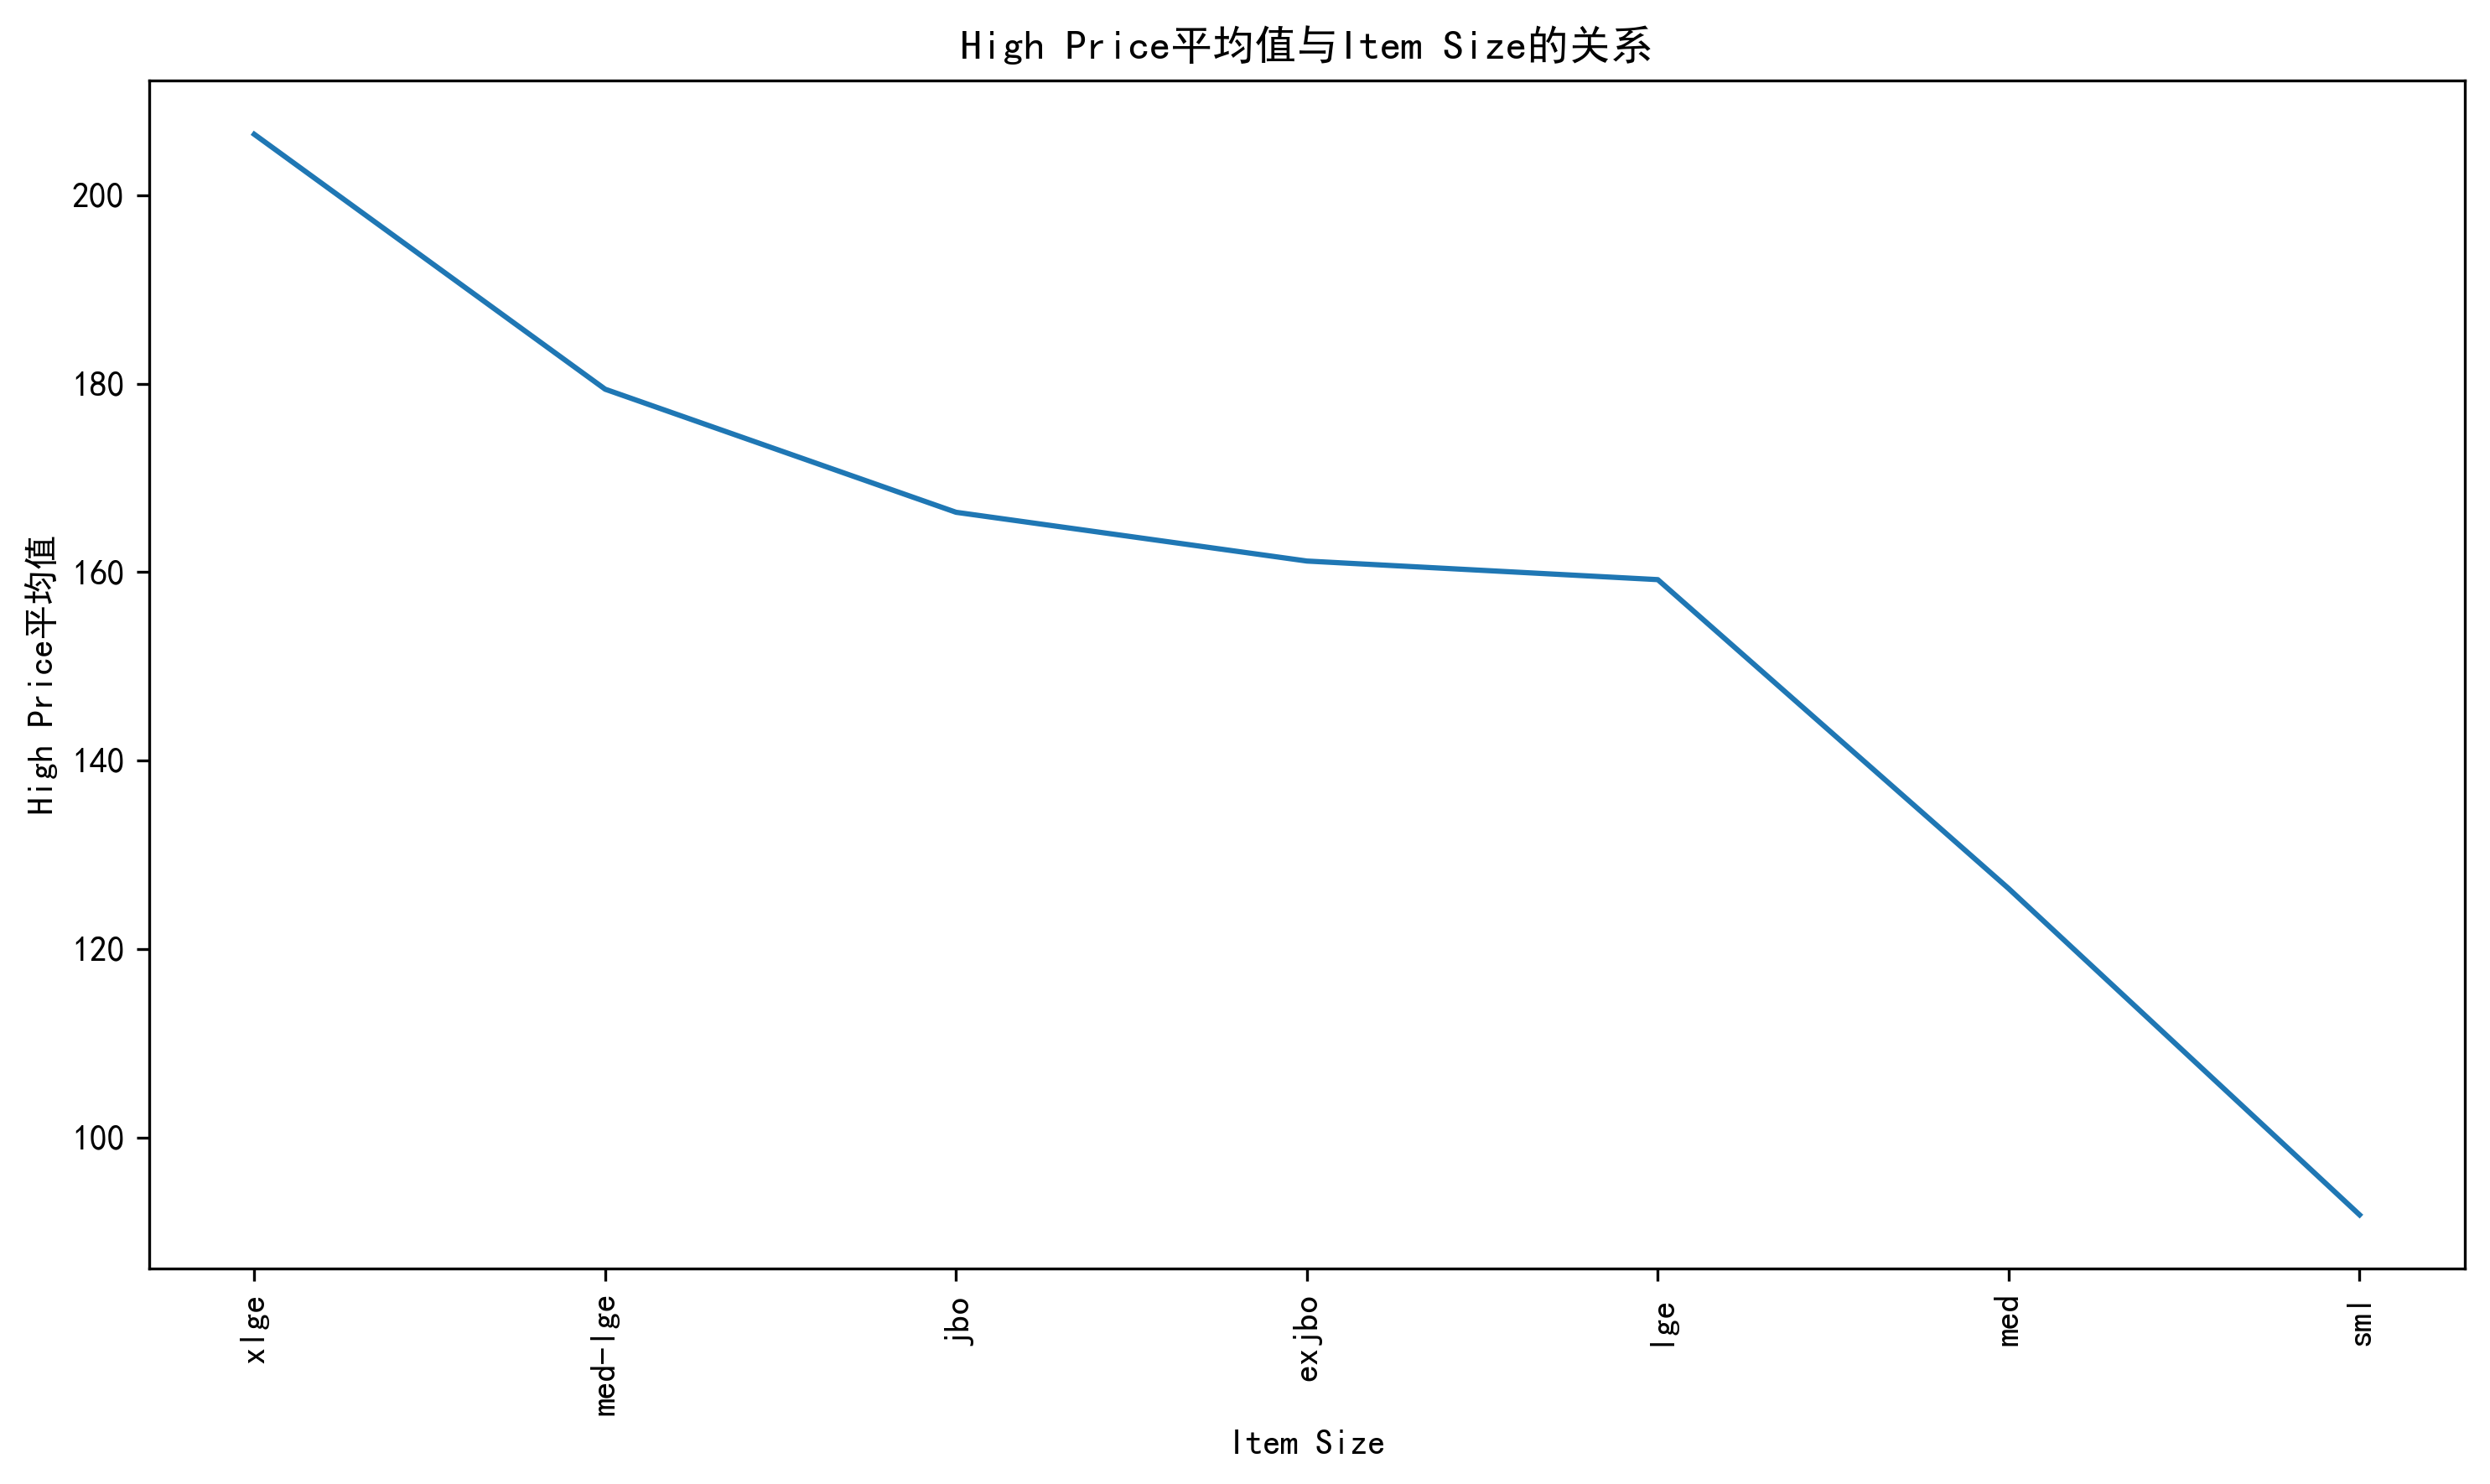


Average 'High Price' by 'Item Size':
Item Size
xlge       206.479268
med-lge    179.418421
jbo        166.353516
exjbo      161.176471
lge        159.203390
Name: High Price, dtype: float64


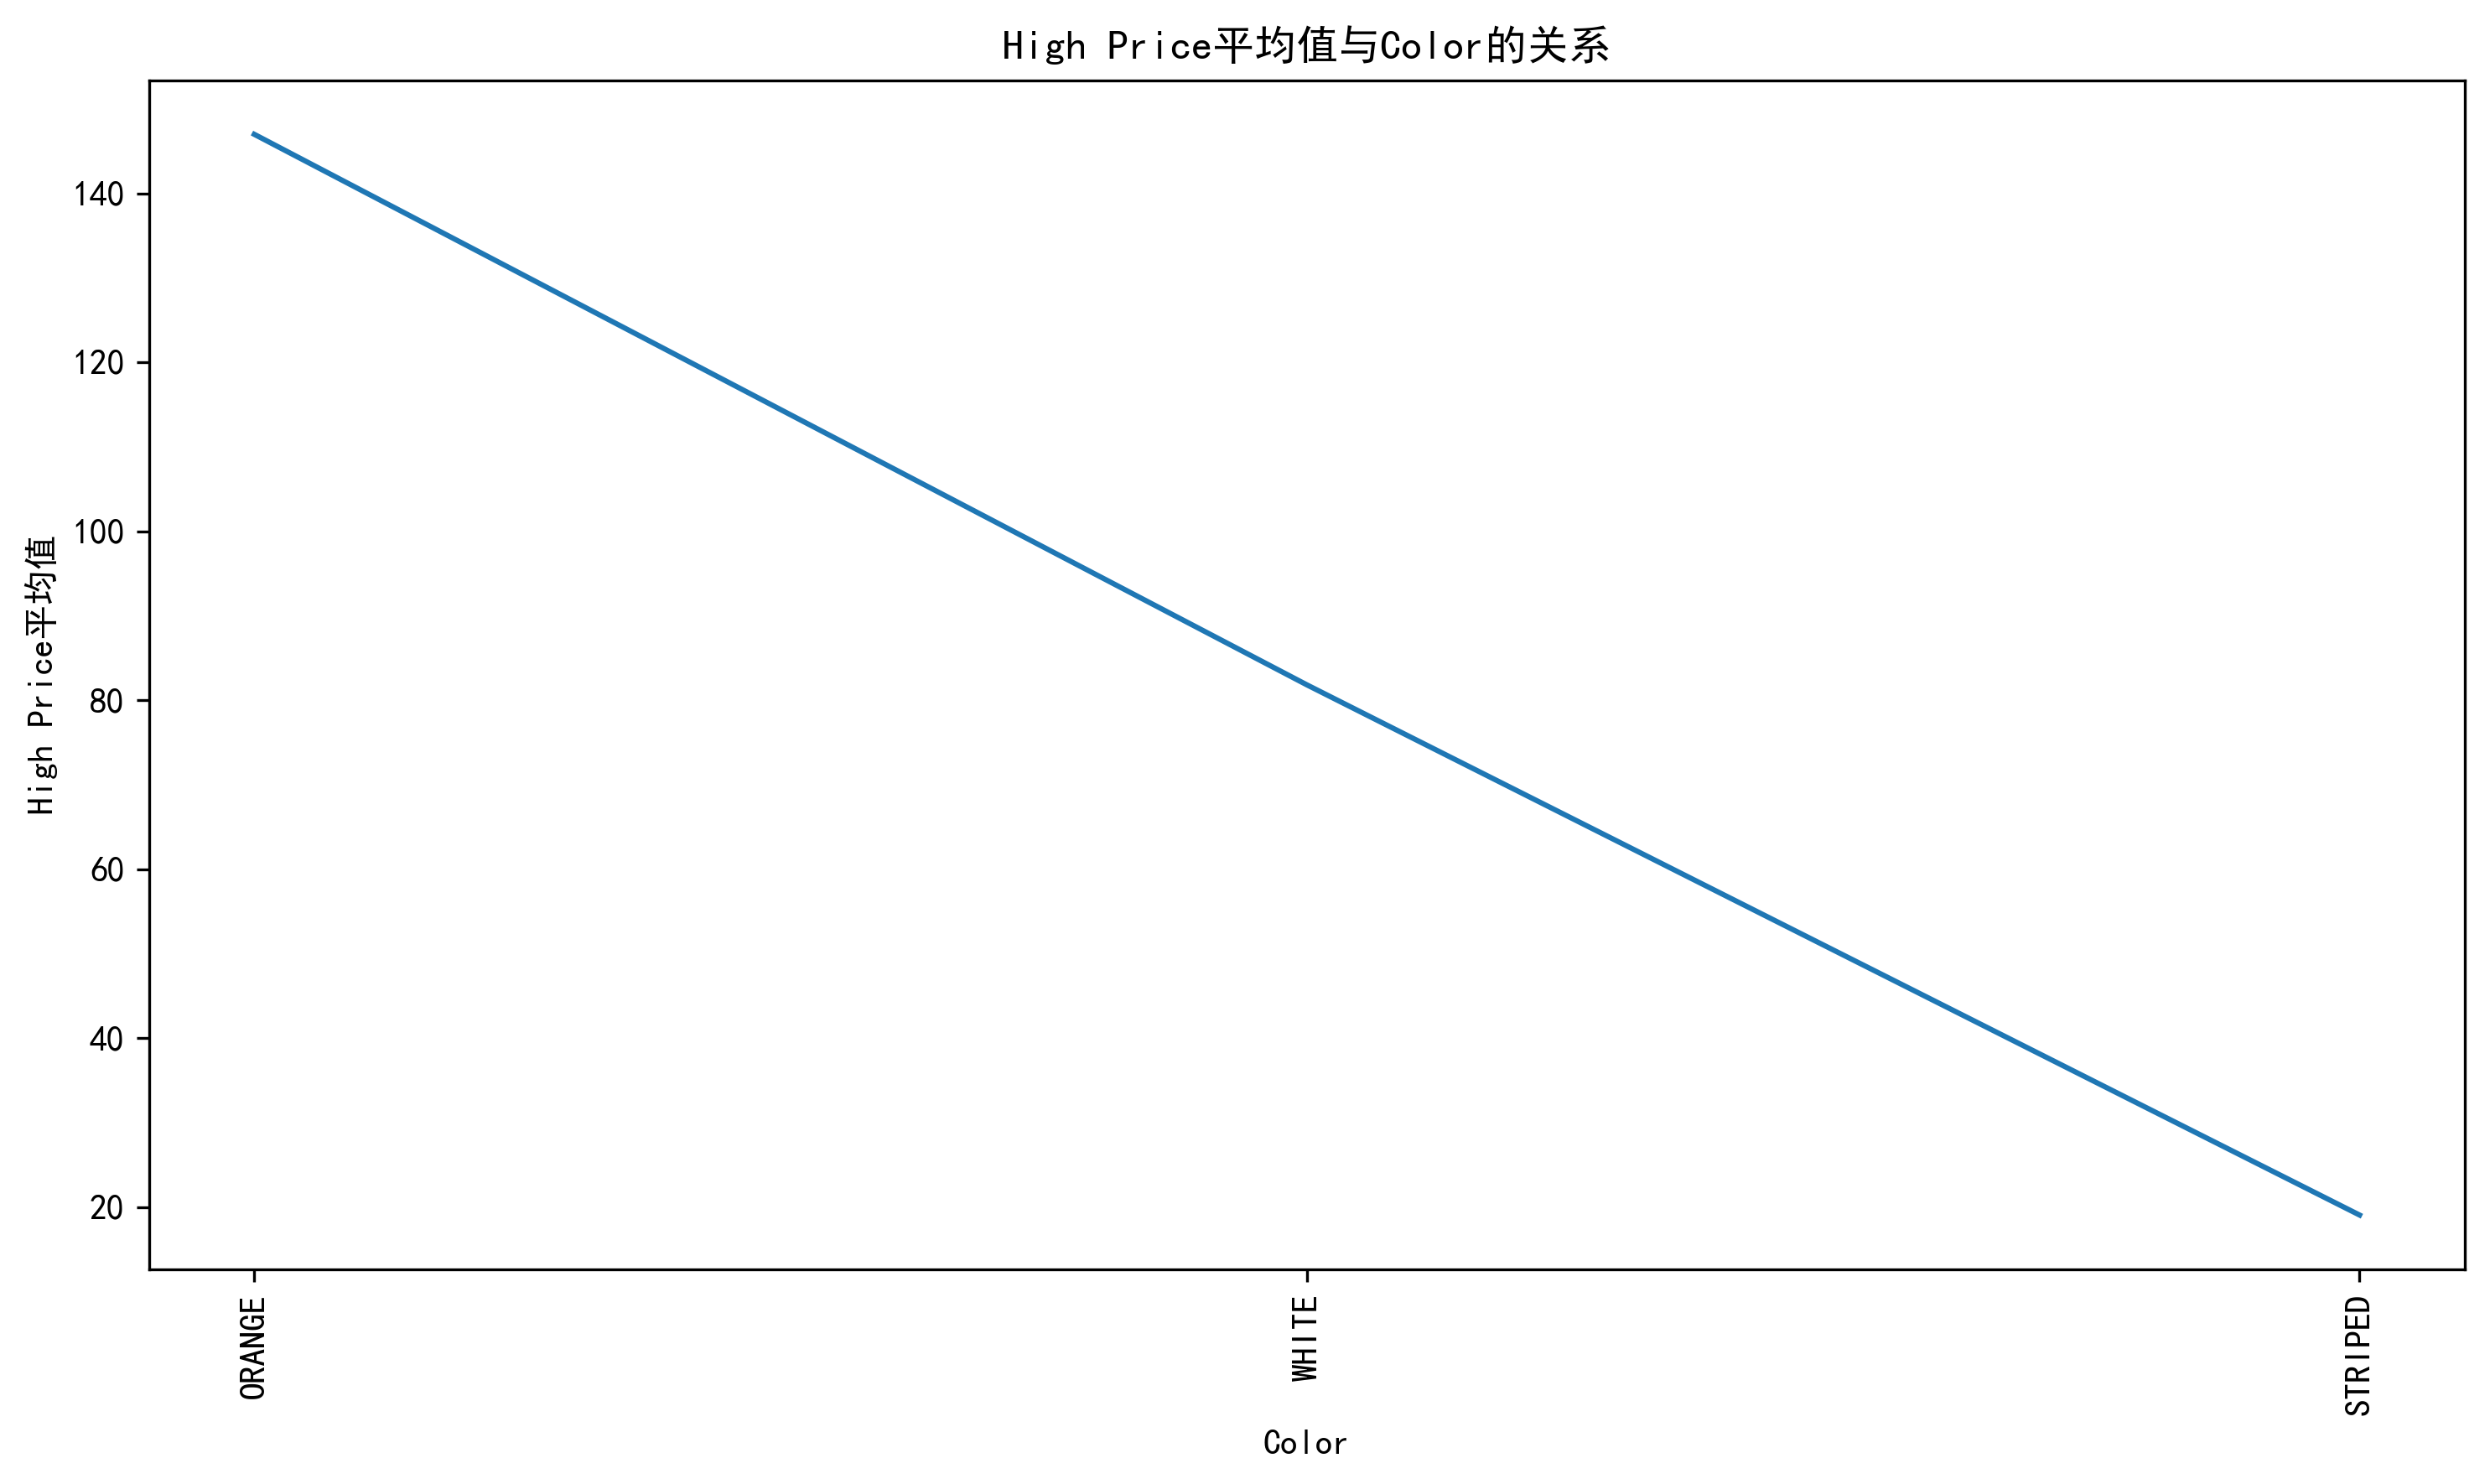


Average 'High Price' by 'Color':
Color
ORANGE     146.987828
WHITE       81.828638
STRIPED     19.083333
Name: High Price, dtype: float64


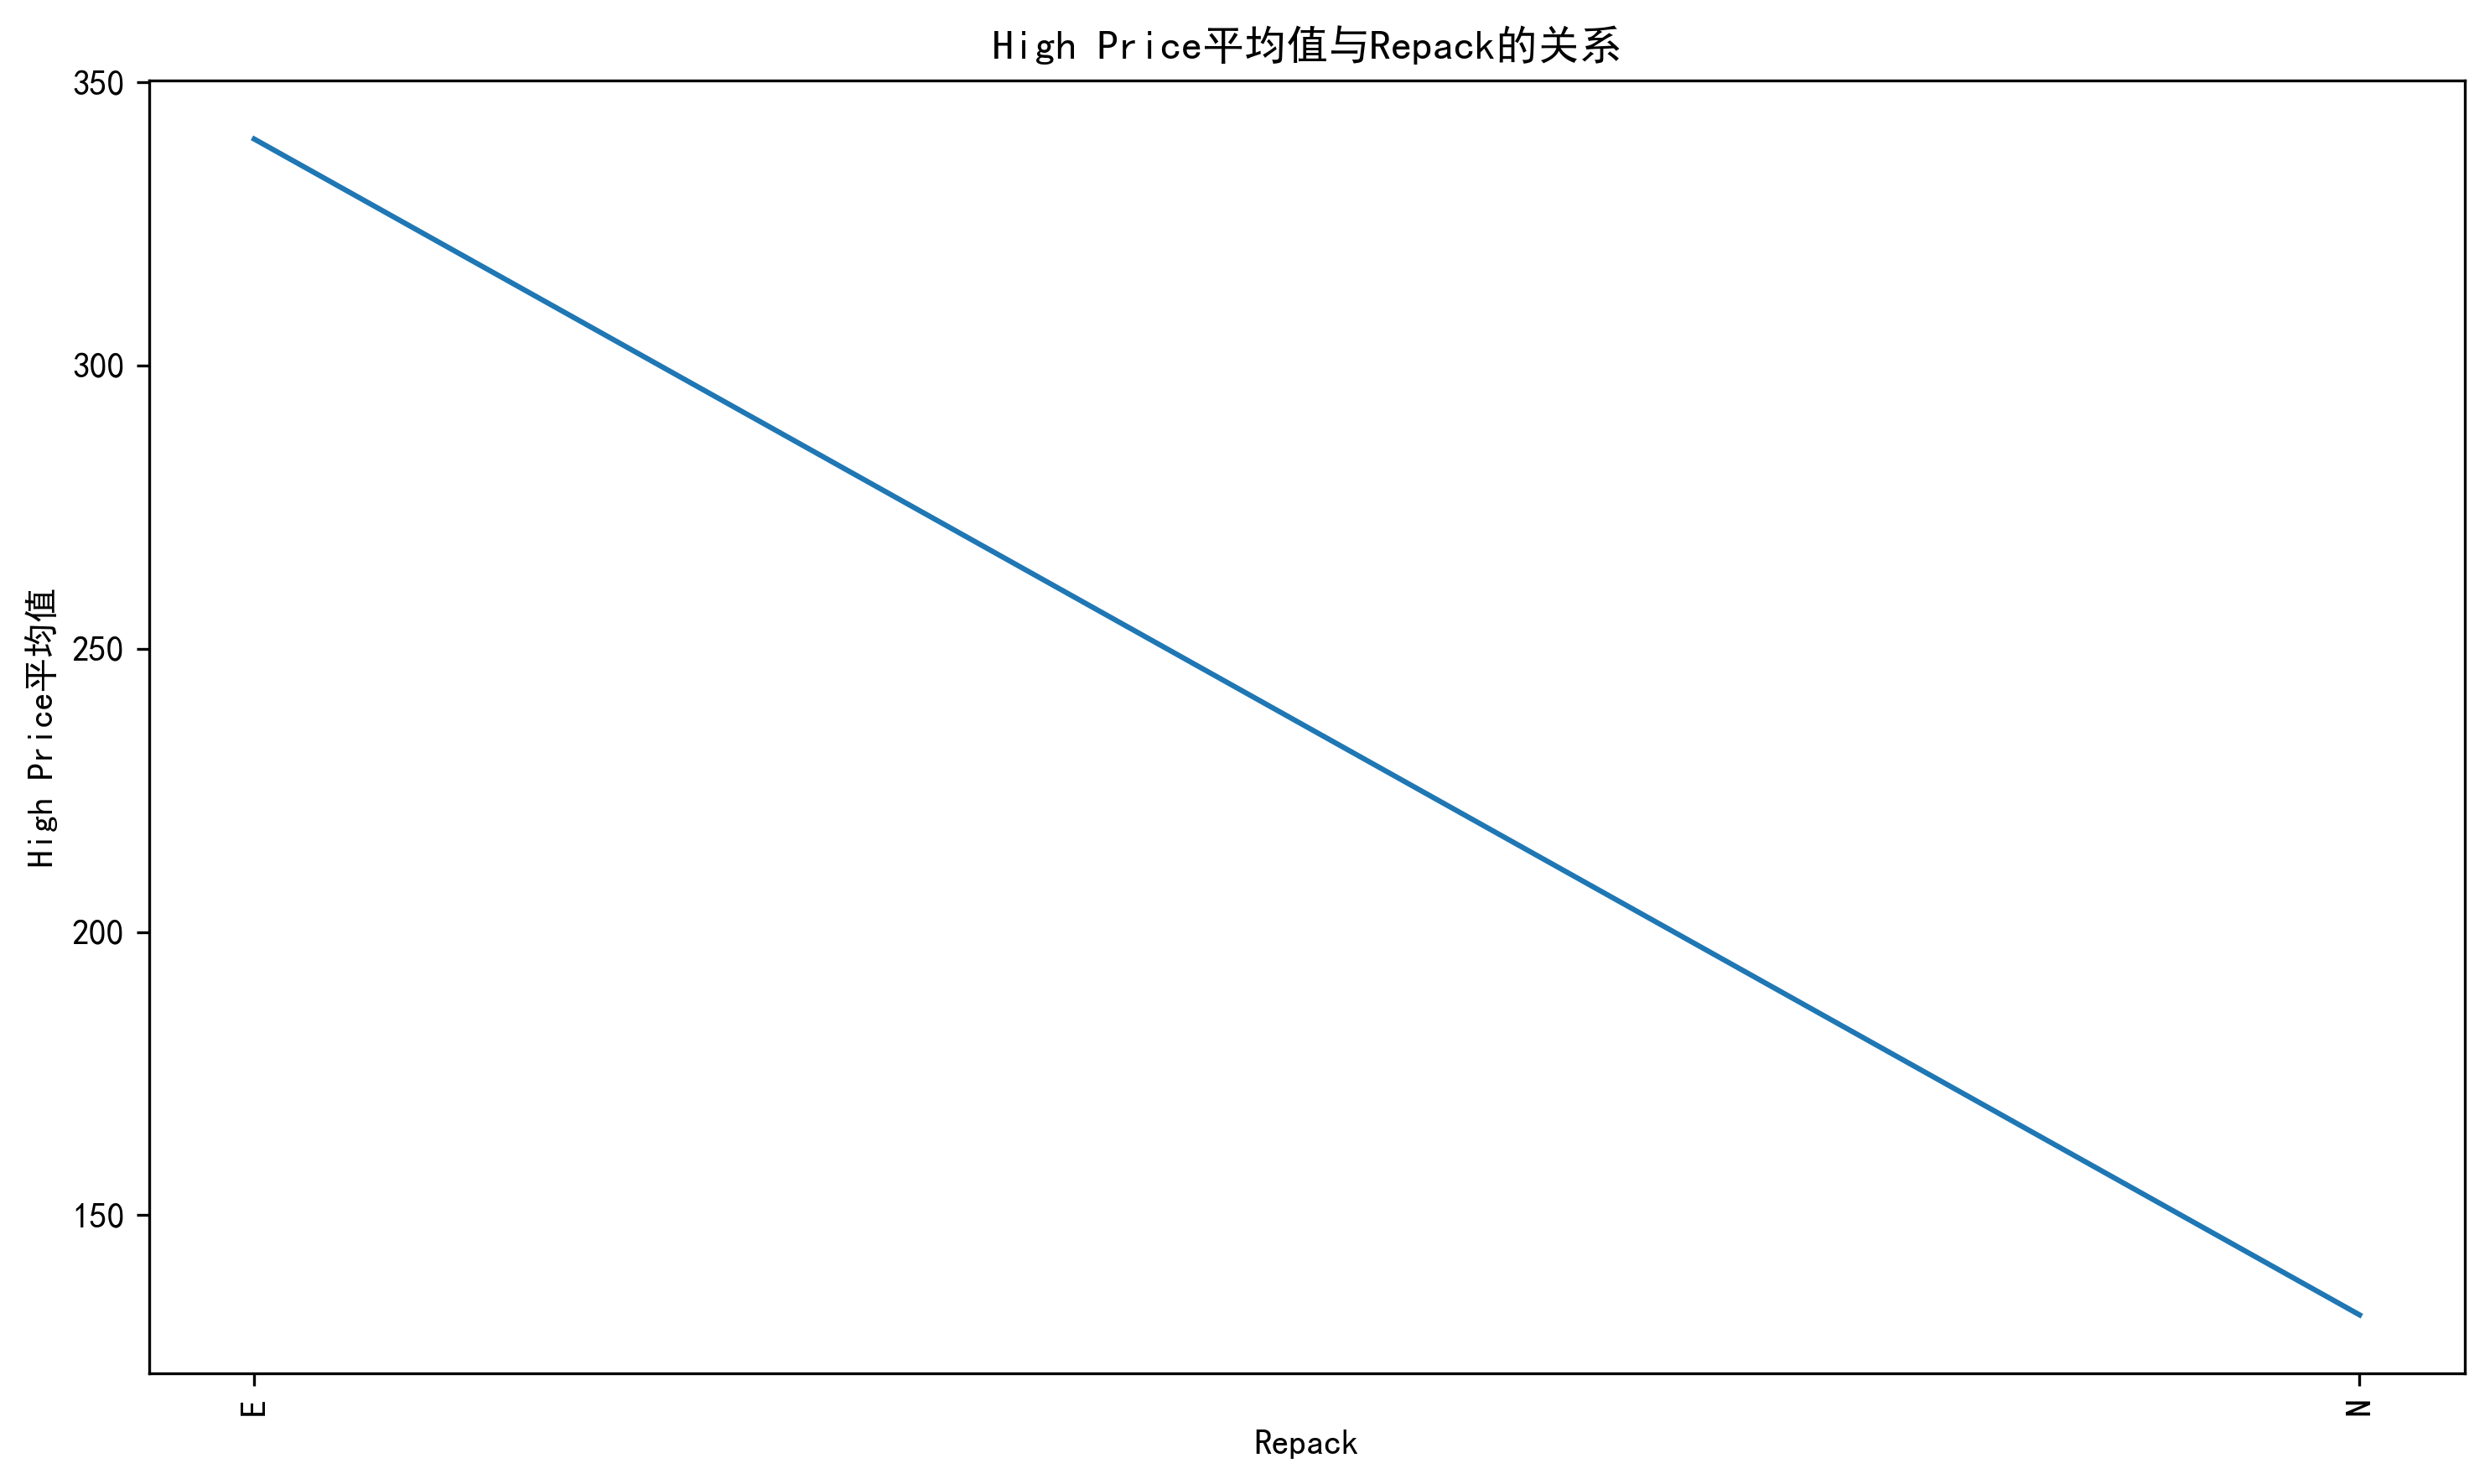


Average 'High Price' by 'Repack':
Repack
E    340.000000
N    132.380103
Name: High Price, dtype: float64


In [8]:
# 非数值型列与 High Price 的相关性
import matplotlib.pyplot as plt

non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']

# 绘制线性图表展示各非数值型特征与 High Price 的相关关系
for col in non_numeric_cols:
    if 'High Price' in df.columns:
        grouped = df.groupby(col)['High Price'].mean().sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        plt.plot(grouped.index, grouped.values)
        plt.xlabel(col)
        plt.ylabel('High Price平均值')
        plt.title(f'High Price平均值与{col}的关系')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

        print(f"\nAverage 'High Price' by '{col}':")
        print(grouped.head(5))

In [14]:
print(df.shape)
print(df.drop_duplicates().shape)

(1757, 12)
(1728, 12)


In [9]:
from sklearn.model_selection import train_test_split

# 预测 'High Price' 价格
X = df.drop(columns=['High Price'])
y = df['High Price']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"训练集大小: {X_train.shape}")
print(f"测试集大小: {X_test.shape}")

训练集大小: (1405, 11)
测试集大小: (352, 11)


# 特征处理

In [20]:
# 将日期列转换为日期类型
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
# 查看转换后的数据类型
print(df['Date'].dtypes)

# 查看前几行数据
print(df['Date'].head())

datetime64[ns]
0   2017-04-29
1   2017-05-06
2   2016-09-24
3   2016-09-24
4   2016-11-05
Name: Date, dtype: datetime64[ns]


In [22]:
X_train.isnull().any()

City Name      False
Package        False
Variety        False
Date           False
Low Price      False
Mostly Low     False
Mostly High    False
Origin         False
Item Size      False
Color          False
Repack         False
dtype: bool

In [23]:
# 提取数值型和分类型列
numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(exclude=[np.number]).columns

# 删除包含缺失值的行
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

# 对分类变量进行独热编码
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.shape

(1757, 127)

## ?
- color: [red, green, blue, NULL]
- red, green, bule, NULL_column

In [24]:
# 去除重复值
df_clean = df_encoded.drop_duplicates()
df_clean.info(), df_clean.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1717 entries, 0 to 1756
Columns: 127 entries, Low Price to Repack_N
dtypes: bool(123), float64(4)
memory usage: 273.3 KB


(None, (1717, 127))

# 模型构建

In [25]:
df_clean.head()

,Low Price,High Price,Mostly Low,Mostly High,City Name_BALTIMORE,City Name_BOSTON,City Name_CHICAGO,City Name_COLUMBIA,City Name_DALLAS,City Name_DETROIT,...,Origin_WASHINGTON,Item Size_jbo,Item Size_lge,Item Size_med,Item Size_med-lge,Item Size_sml,Item Size_xlge,Color_STRIPED,Color_WHITE,Repack_N
0,270.0,280.0,270.0,280.0,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,270.0,280.0,270.0,280.0,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,160.0,160.0,160.0,160.0,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,160.0,160.0,160.0,160.0,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,90.0,100.0,90.0,100.0,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [26]:

for col in df_clean.columns:
    print(col)

Low Price
High Price
Mostly Low
Mostly High
City Name_BALTIMORE
City Name_BOSTON
City Name_CHICAGO
City Name_COLUMBIA
City Name_DALLAS
City Name_DETROIT
City Name_LOS ANGELES
City Name_MIAMI
City Name_NEW YORK
City Name_PHILADELPHIA
City Name_SAN FRANCISCO
City Name_ST. LOUIS
Package_1 1/9 bushel crates
Package_1/2 bushel cartons
Package_20 lb cartons
Package_22 lb cartons
Package_24 inch bins
Package_35 lb cartons
Package_36 inch bins
Package_40 lb cartons
Package_50 lb cartons
Package_50 lb sacks
Package_bins
Package_bushel baskets
Package_bushel cartons
Package_each
Variety_BLUE TYPE
Variety_CINDERELLA
Variety_FAIRYTALE
Variety_HOWDEN TYPE
Variety_HOWDEN WHITE TYPE
Variety_KNUCKLE HEAD
Variety_MINIATURE
Variety_MIXED HEIRLOOM VARIETIES
Variety_PIE TYPE
Date_2016-09-24 00:00:00
Date_2016-09-26 00:00:00
Date_2016-09-27 00:00:00
Date_2016-09-28 00:00:00
Date_2016-09-29 00:00:00
Date_2016-09-30 00:00:00
Date_2016-10-01 00:00:00
Date_2016-10-08 00:00:00
Date_2016-10-15 00:00:00
Date_2016

In [27]:
# 重新划分特征和目标变量
X = df_clean.drop(columns=['High Price', 'Low Price', 'Mostly High', 'Mostly Low'])
y = df_clean['High Price']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(1373, 123) (344, 123)


In [28]:
# 再次检查并删除包含缺失值的行
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

print(X_train.shape, X_test.shape)

(1373, 123) (344, 123)


In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# 定义参数范围
param_grid = {
    'learning_rate': [0.2],
    'n_estimators': [150],
    'max_depth': [5]
}

# 创建 GBDT 回归模型
gbdt_model = GradientBoostingRegressor(random_state=42)

# 使用 GridSearchCV 进行网格搜索和交叉验证
grid_search = GridSearchCV(estimator=gbdt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("最优参数:", grid_search.best_params_)

# 获取最优模型
best_gbdt_model = grid_search.best_estimator_

# 在训练集和测试集上进行预测
y_train_pred = best_gbdt_model.predict(X_train)
y_test_pred = best_gbdt_model.predict(X_test)

# 评估模型在训练集和测试集上的表现
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\n训练集表现：")
print(f"均方误差: {train_mse}")
print(f"R^2 分数: {train_r2}")

print("\n测试集表现：")
print(f"均方误差: {test_mse}")
print(f"R^2 分数: {test_r2}")

最优参数: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}

训练集表现：
均方误差: 124.26889475414832
R^2 分数: 0.9843099991807923

测试集表现：
均方误差: 730.3664166240736
R^2 分数: 0.9084697339614028


In [39]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 构建 GBDT 回归模型
gbdt_model = GradientBoostingRegressor(random_state=42, max_depth=5, n_estimators=100)
gbdt_model.fit(X_train, y_train)

# 在训练集和测试集上进行预测
y_train_pred = gbdt_model.predict(X_train)
y_test_pred = gbdt_model.predict(X_test)

# 评估模型在训练集和测试集上的表现
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("训练集表现：")
print(f"均方误差: {train_mse}")
print(f"R^2 分数: {train_r2}")

print("\n测试集表现：")
print(f"均方误差: {test_mse}")
print(f"R^2 分数: {test_r2}")


训练集表现：
均方误差: 345.3495367731142
R^2 分数: 0.9563966950409987

测试集表现：
均方误差: 816.320878086083
R^2 分数: 0.8976978329734204
